In [2]:
# imports
import io
import os
import sys
import dvc.api
import pandas as pd
import dataframe_image as dfi
import warnings
warnings.filterwarnings('ignore')

In [6]:
# adding and setting up scripts
sys.path.append('.')
sys.path.append('..')
sys.path.insert(1, '../scripts/')
import defaults as defs
import dataCleaner as dc
import dataVisualizer as dv

cleaner = dc.dataCleaner('data preparation notebook')
visualizer = dv.dataVisualizer('data preparation notebook')

--> <Logger dataCleaner (DEBUG)>
logger <Logger dataCleaner (DEBUG)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (DEBUG)>
logger <Logger dataVisualizer (DEBUG)> created at path: ../logs/visualizer_root.log
Data visualizer in action


In [7]:
# pandas settings
pd.set_option('display.max_columns', 30)

# version of the data
# v1 : gdrive 
# v2 : local messed up store
# v3 : local correct store
version = 'v3'

# read data sets using dvc api
test_data_url = dvc.api.get_url(path = defs.test_local_path, 
                                repo = defs.repo, 
                                rev = version)

train_data_url = dvc.api.get_url(path = defs.train_local_path, 
                                repo = defs.repo, 
                                rev = version)

store_data_url = dvc.api.get_url(path = defs.store_local_path, 
                                repo = defs.repo, 
                                rev = version)
print('test data path: ' + test_data_url, '\ntrain data path: ' + train_data_url, '\nstore data path: ' + store_data_url)

test data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\70\2189c326ce783ff913ddd6ff984946 
train data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\d4\7aedd9e2d580e06a6ef7ce1732e8b6 
store data path: C:\Users\f0x-tr0t\Documents\education\datascience\dvc-storage\30\c9ccb5af66c21f65e7d1da967e6251


In [8]:
# reading csv files
DateCols = ['Date']
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

"""test_data = pd.read_csv(io.StringIO(test_data_url), na_values=missing_values, parse_dates=DateCols, low_memory=False)
train_data = pd.read_csv(io.StringIO(train_data_url), na_values=missing_values, parse_dates=DateCols, low_memory=False)
store_data = pd.read_csv(io.StringIO(store_data_url), na_values=missing_values, low_memory=False)"""

test_data = pd.read_csv(test_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
train_data = pd.read_csv(train_data_url, na_values=missing_values, parse_dates=DateCols, low_memory=False)
store_data = pd.read_csv(store_data_url, na_values=missing_values, low_memory=False)

# Data preparation

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [11]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Missing values

In [12]:
cleaner.percent_missing(train_data)
cleaner.percent_missing(test_data)
cleaner.percent_missing(store_data)

The dataset contains 0.0 % missing values
The dataset contains 0.0033464759 % missing values
The dataset contains 21.0134529148 % missing values


### Visualize missing columns

In [13]:
missing_df = cleaner.missing_values_table(store_data)

Your selected dataframe has 10 features.
There are 6 features that have missing values.


In [14]:
missing_df

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


In [15]:
store_data[missing_df.index]

,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance
0,NaN,NaN,NaN,9.0,2008.0,1270.0
1,13.0,2010.0,"Jan,Apr,Jul,Oct",11.0,2007.0,570.0
2,14.0,2011.0,"Jan,Apr,Jul,Oct",12.0,2006.0,14130.0
3,NaN,NaN,NaN,9.0,2009.0,620.0
4,NaN,NaN,NaN,4.0,2015.0,29910.0
...,...,...,...,...,...,...
1110,31.0,2013.0,"Jan,Apr,Jul,Oct",6.0,2014.0,1900.0
1111,NaN,NaN,NaN,4.0,2006.0,1880.0
1112,NaN,NaN,NaN,NaN,NaN,9260.0
1113,NaN,NaN,NaN,NaN,NaN,870.0


#### Filling missing values

##### Store data set

In [16]:
# filing the competition distance feature
max_dist = store_data['CompetitionDistance'].max()
cleaner.fix_missing_value(store_data, ['CompetitionDistance'], max_dist)

3 missing values in the feature CompetitionDistance have been replaced by 75860.0.


In [17]:
# filling the competition open since year and month features
min_year = store_data['CompetitionOpenSinceYear'].min()
cleaner.fix_missing_value(store_data, ['CompetitionOpenSinceYear'], min_year)
cleaner.fix_missing_value(store_data, ['CompetitionOpenSinceMonth'], 1)

354 missing values in the feature CompetitionOpenSinceYear have been replaced by 1900.0.
354 missing values in the feature CompetitionOpenSinceMonth have been replaced by 1.


In [18]:
# filling the promo2since week and year features
cleaner.fix_missing_value(store_data, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

544 missing values in the feature Promo2SinceWeek have been replaced by 0.
544 missing values in the feature Promo2SinceYear have been replaced by 0.


In [19]:
# filling the promo interval feature
cleaner.fix_missing_value(store_data, ['PromoInterval'], '0,0,0,0')

544 missing values in the feature PromoInterval have been replaced by 0,0,0,0.


##### Test data set

In [20]:
open_mean = test_data['Open'].mean()
cleaner.fix_missing_value(test_data, ['Open'], open_mean)

11 missing values in the feature Open have been replaced by 0.8543223701828274.


In [21]:
# final check for missing values
cleaner.percent_missing(train_data)
cleaner.percent_missing(test_data)
cleaner.percent_missing(store_data)

The dataset contains 0.0 % missing values
The dataset contains 0.0 % missing values
The dataset contains 0.0 % missing values


## Data types

### Store data type

In [22]:
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [23]:
# change the object data types to string
string_columns = ['StoreType', 'Assortment']
store_data = cleaner.convert_to_string(store_data, string_columns)

feature: StoreType converted to string data type format
feature: Assortment converted to string data type format


In [24]:
# change the float data types to int
float_columns = store_data.select_dtypes(include='float').columns.tolist()
store_data = cleaner.convert_to_int(store_data, float_columns)

feature: CompetitionDistance converted to integer data type format
feature: CompetitionOpenSinceMonth converted to integer data type format
feature: CompetitionOpenSinceYear converted to integer data type format
feature: Promo2SinceWeek converted to integer data type format
feature: Promo2SinceYear converted to integer data type format


In [25]:
#  convert string types to int
store_data = cleaner.encode_to_numeric(store_data, ['StoreType', 'Assortment'])

feature: StoreType label encoded
feature: Assortment label encoded


In [26]:
# convert float to int
store_data = cleaner.convert_to_int(store_data, ['CompetitionDistance', 'CompetitionOpenSinceMonth'])

feature: CompetitionDistance converted to integer data type format
feature: CompetitionOpenSinceMonth converted to integer data type format


In [27]:
store_data.dtypes

Store                         int64
StoreType                     int32
Assortment                    int32
CompetitionDistance           int64
CompetitionOpenSinceMonth     int64
CompetitionOpenSinceYear      int64
Promo2                        int64
Promo2SinceWeek               int64
Promo2SinceYear               int64
PromoInterval                object
dtype: object

### Train data type

In [28]:
train_data.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [29]:
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

In [30]:
# convert the state holiday feature data type from mixed to string
train_data = cleaner.convert_to_string(train_data, ['StateHoliday'])

feature: StateHoliday converted to string data type format


In [31]:
# convert the string datatype to int
train_data = cleaner.encode_to_numeric(train_data, ['StateHoliday'])

feature: StateHoliday label encoded


In [32]:
# convert float to int
train_data = cleaner.convert_to_int(train_data, ['Sales', 'Customers'])

feature: Sales converted to integer data type format
feature: Customers converted to integer data type format


In [33]:
train_data.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int64
dtype: object

### Test data types

In [34]:
test_data.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [35]:
# change object data type to string
test_data = cleaner.convert_to_string(test_data, ['StateHoliday'])
test_data = cleaner.encode_to_numeric(test_data, ['StateHoliday'])

feature: StateHoliday converted to string data type format
feature: StateHoliday label encoded


In [36]:
# change float to int
test_data = cleaner.convert_to_int(test_data, ['Open'])

feature: Open converted to integer data type format


In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  int64         
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  int32         
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(6)
memory usage: 2.4 MB


## Duplicates

In [38]:
# search for duplicate rows and drop them
cleaner.drop_duplicates(train_data)
cleaner.drop_duplicates(test_data)
cleaner.drop_duplicates(store_data)

No duplicate rows were found.
No duplicate rows were found.
No duplicate rows were found.


## Outliers

### Train data set

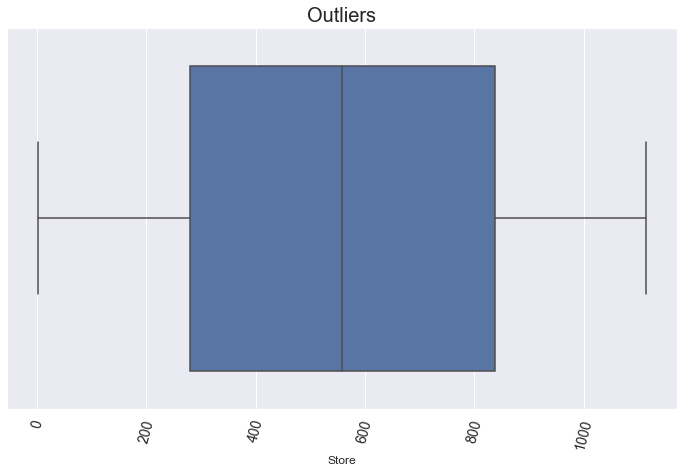

In [39]:
visualizer.plot_box(train_data, 'Store', 'Outliers')

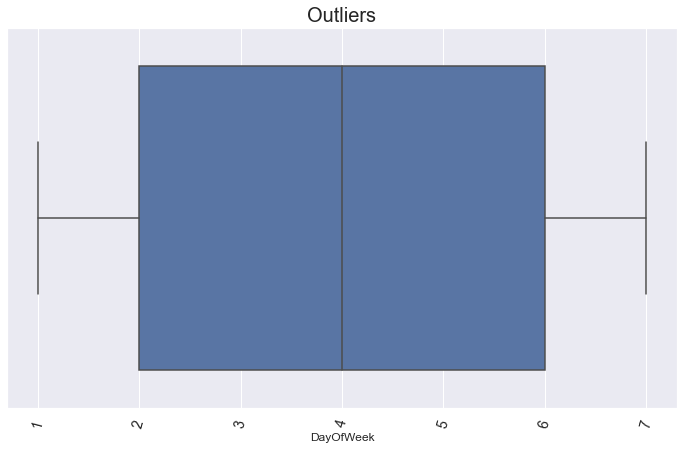

In [40]:
visualizer.plot_box(train_data, 'DayOfWeek', 'Outliers')

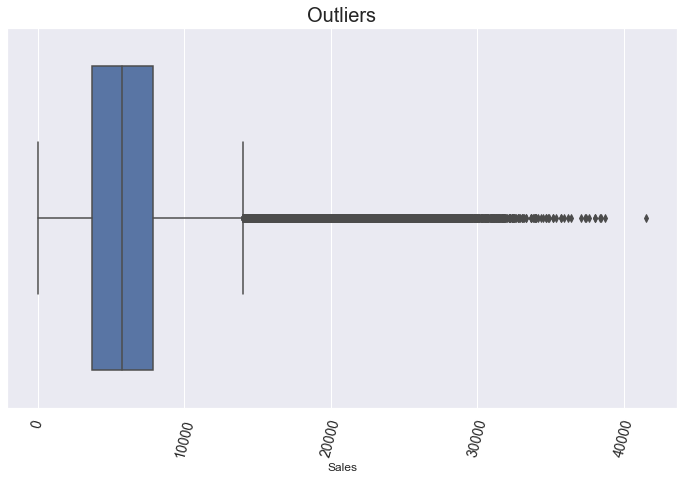

In [41]:
visualizer.plot_box(train_data, 'Sales', 'Outliers')

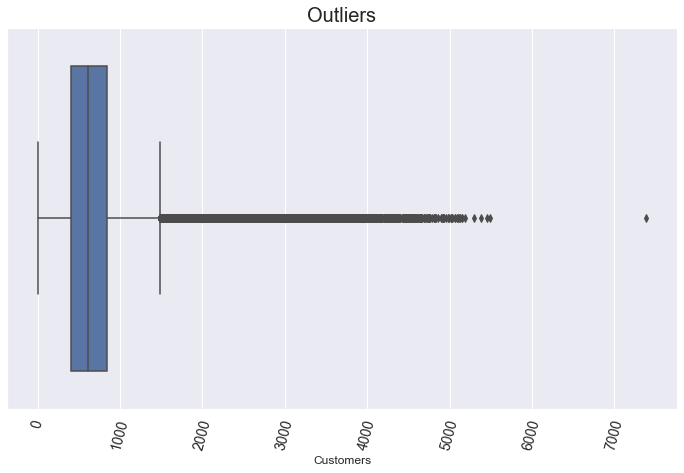

In [42]:
visualizer.plot_box(train_data, 'Customers', 'Outliers')

### Test data set

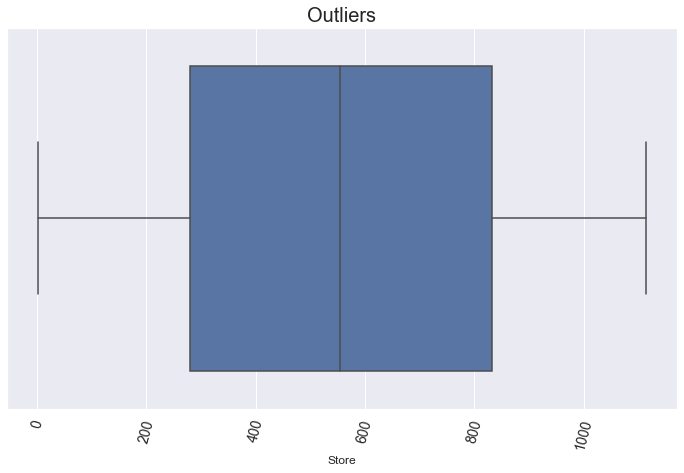

In [43]:
visualizer.plot_box(test_data, 'Store', 'Outliers')

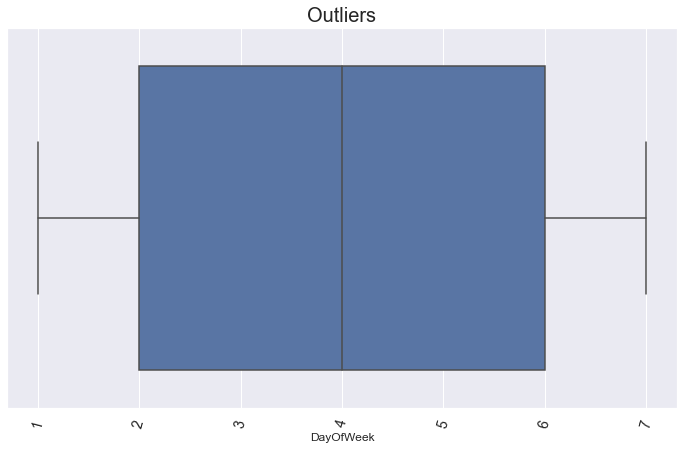

In [44]:
visualizer.plot_box(test_data, 'DayOfWeek', 'Outliers')

### Store data set

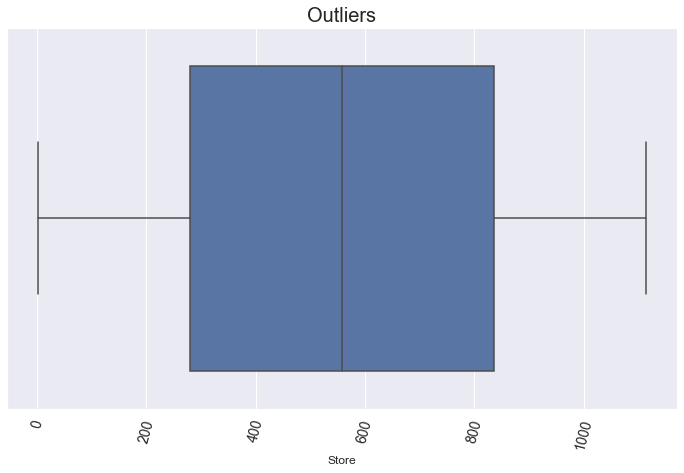

In [45]:
visualizer.plot_box(store_data, 'Store', 'Outliers')

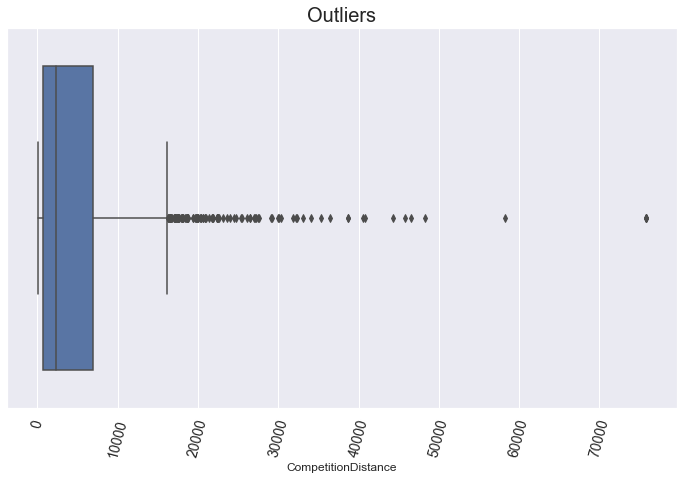

In [46]:
visualizer.plot_box(store_data, 'CompetitionDistance', 'Outliers')

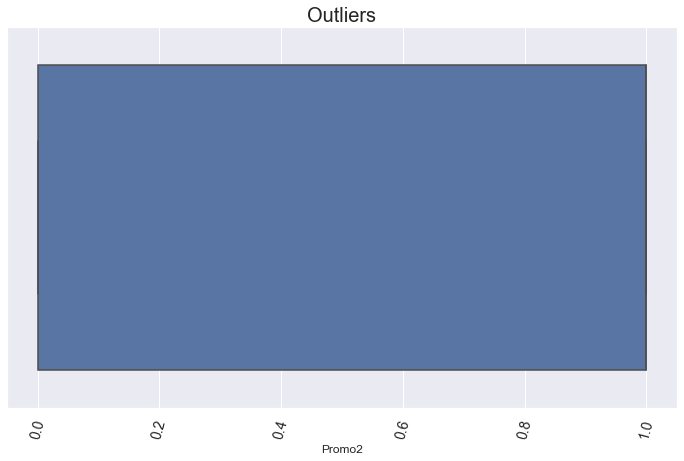

In [47]:
visualizer.plot_box(store_data, 'Promo2', 'Outliers')

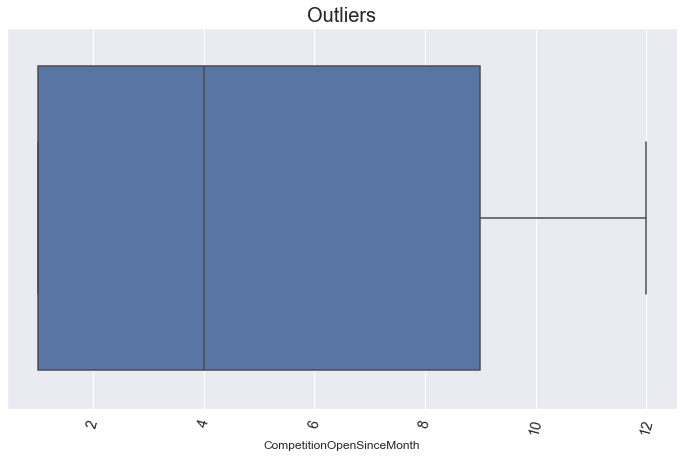

In [48]:
visualizer.plot_box(store_data, 'CompetitionOpenSinceMonth', 'Outliers')

### Fixing outliers

In [49]:
cleaner.replace_outlier_with_median(dataFrame = train_data, feature = 'Sales')
cleaner.replace_outlier_with_median(dataFrame = train_data, feature = 'Customers')

# return float to int
train_data = cleaner.convert_to_int(train_data, ['Sales', 'Customers'])

feature: Sales outlier values greater than: 14049.5 fixed successfully with the median value of: 5744.0
feature: Sales outlier values less than: -2466.5 fixed successfully with the median value of: 5744.0
feature: Customers outlier values greater than: 1485.0 fixed successfully with the median value of: 609.0
feature: Customers outlier values less than: -243.0 fixed successfully with the median value of: 609.0
feature: Sales converted to integer data type format
feature: Customers converted to integer data type format


In [50]:
cleaner.replace_outlier_with_median(store_data, 'CompetitionDistance')
cleaner.replace_outlier_with_median(store_data, 'CompetitionOpenSinceMonth')

# return float to int
store_data = cleaner.convert_to_int(store_data, ['CompetitionDistance', 'CompetitionOpenSinceMonth'])

feature: CompetitionDistance outlier values greater than: 16182.5 fixed successfully with the median value of: 2330.0
feature: CompetitionDistance outlier values less than: -8557.5 fixed successfully with the median value of: 2330.0
feature: CompetitionOpenSinceMonth outlier values greater than: 21.0 fixed successfully with the median value of: 4.0
feature: CompetitionOpenSinceMonth outlier values less than: -11.0 fixed successfully with the median value of: 4.0
feature: CompetitionDistance converted to integer data type format
feature: CompetitionOpenSinceMonth converted to integer data type format


## Feature engineering

### Train data set

In [51]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,609,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1


In [52]:
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)
train_data['WeekOfYear'] = train_data['Date'].apply(lambda x: x.weekofyear)
train_data['weekday'] = train_data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

In [53]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,1
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,1
3,4,5,2015-07-31,13995,609,1,1,0,1,2015,7,31,31,1
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int32         
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
 13  weekday        1017209 non-null  int64         
dtypes: datetime64[ns](1), int32(1), in

### Store data set

In [55]:
# split the PromoInterval column into 4 columns
store_data['PromoInterval0'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 0)))
store_data['PromoInterval1'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 1)))
store_data['PromoInterval2'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 2)))
store_data['PromoInterval3'] = store_data.PromoInterval.apply((lambda x: cleaner.getMonth(x, 3)))

In [56]:
# change the object data type of 
store_data = cleaner.convert_to_string(store_data, ['PromoInterval'])
store_data = cleaner.encode_to_numeric(store_data, ['PromoInterval'])

feature: PromoInterval converted to string data type format
feature: PromoInterval label encoded


### A final look at our data frames

In [57]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,1
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,1
3,4,5,2015-07-31,13995,609,1,1,0,1,2015,7,31,31,1
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1,1


In [58]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1,0,0,0
41084,41085,1112,6,2015-08-01,1,0,0,0
41085,41086,1113,6,2015-08-01,1,0,0,0
41086,41087,1114,6,2015-08-01,1,0,0,0


In [59]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,2,0,1270,9,2008,0,0,0,0,0,0,0,0
1,2,0,0,570,11,2007,1,13,2010,2,1,4,7,10
2,3,0,0,14130,12,2006,1,14,2011,2,1,4,7,10
3,4,2,2,620,9,2009,0,0,0,0,0,0,0,0
4,5,0,0,2330,4,2015,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900,6,2014,1,31,2013,2,1,4,7,10
1111,1112,2,2,1880,4,2006,0,0,0,0,0,0,0,0
1112,1113,0,2,9260,1,1900,0,0,0,0,0,0,0,0
1113,1114,0,2,870,1,1900,0,0,0,0,0,0,0,0


In [60]:
train_data.info()
test_data.info()
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int32         
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayOfMonth     1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
 13  weekday        1017209 non-null  int64         
dtypes: datetime64[ns](1), int32(1), in

### Merging data sets

* Merge the store and train data sets into one data set

In [61]:
# merging store_df and train_df
full_data = pd.merge(train_data, store_data, how = 'inner', on = 'Store')
full_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,1,2,0,1270,9,2008,0,0,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,31,1,2,0,1270,9,2008,0,0,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,31,1,2,0,1270,9,2008,0,0,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,31,1,2,0,1270,9,2008,0,0,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,31,1,2,0,1270,9,2008,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,1,5,1,0,3,2,5350,1,1900,1,22,2012,3,3,6,9,12
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,1,4,1,1,3,2,5350,1,1900,1,22,2012,3,3,6,9,12
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,1,3,1,1,3,2,5350,1,1900,1,22,2012,3,3,6,9,12
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,1,2,1,1,3,2,5350,1,1900,1,22,2012,3,3,6,9,12


In [62]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  DayOfMonth                 1017209 no

### Save and version the prepared datasets

In [63]:
cleaner.save_data(df=train_data, path=defs.train_local_path, index=False, type='csv')
cleaner.save_data(df=test_data, path=defs.test_local_path, index=False, type='csv')
cleaner.save_data(df=store_data, path=defs.store_local_path, index=False, type='csv')
cleaner.save_data(df=full_data, path=defs.merged_local_path, index=False, type='csv')

data frame with shape: (1017209, 14) saved as a csv file at path: ../rossmann-store-sales/train.csv successfully
data frame with shape: (41088, 8) saved as a csv file at path: ../rossmann-store-sales/test.csv successfully
data frame with shape: (1115, 14) saved as a csv file at path: ../rossmann-store-sales/store.csv successfully
data frame with shape: (1017209, 27) saved as a csv file at path: ../rossmann-store-sales/merged.csv successfully


#### Save data frames to image for cml

In [64]:
dfi.export(train_data, '../plots/train_data.png', max_rows=20)
dfi.export(test_data, '../plots/test_data.png', max_rows=20)
dfi.export(store_data, '../plots/store_data.png', max_rows=20)
dfi.export(full_data, '../plots/full_data.png', max_rows=20)